In [83]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from stat_func import y_int_regression_line, slope_regression_line, r_coefficient

In [41]:
price_elements = []
title_elements = []
rating_elements = []
ratings = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5,
}
def scrape_page(page_url):
    titles_grouped = []
    # Loading Page
    next_page = 'https://books.toscrape.com/'
    resp = requests.get(page_url)
    soup = BeautifulSoup(resp.content, 'html.parser')
    
    # Extracting title, price, and rating
    for element in soup.find_all('p', attrs={'class': 'price_color'}):
        price_elements.append(element)
        title_elements.append(element.parent.parent.find('h3'))
        rating_elements.append(element.parent.parent.find('p'))
        price = float(element.get_text()[1:])
        title = element.parent.parent.find('h3').get_text()
        rating = ratings[element.parent.parent.find('p').attrs['class'][1]]
        titles_grouped.append({'title': title, 'price': price, 'rating': rating})
    
    # Extracting link for next page 
    all_anchors = soup.find_all('a')
    for index, element in enumerate(all_anchors):
        if element.get_text() == 'next':
            if 'catalogue' in element.attrs['href']:
                return next_page + element.attrs['href'], titles_grouped
            else:
                return next_page + 'catalogue/' + element.attrs['href'], titles_grouped
        if index == len(all_anchors)-1:
            return None, titles_grouped

In [42]:
data_set = []
next_html = 'https://books.toscrape.com/'
while next_html is not None:
    next_html, new_dataset = scrape_page(next_html)
    data_set += new_dataset
    print(next_html)

https://books.toscrape.com/catalogue/page-2.html
https://books.toscrape.com/catalogue/page-3.html
https://books.toscrape.com/catalogue/page-4.html
https://books.toscrape.com/catalogue/page-5.html
https://books.toscrape.com/catalogue/page-6.html
https://books.toscrape.com/catalogue/page-7.html
https://books.toscrape.com/catalogue/page-8.html
https://books.toscrape.com/catalogue/page-9.html
https://books.toscrape.com/catalogue/page-10.html
https://books.toscrape.com/catalogue/page-11.html
https://books.toscrape.com/catalogue/page-12.html
https://books.toscrape.com/catalogue/page-13.html
https://books.toscrape.com/catalogue/page-14.html
https://books.toscrape.com/catalogue/page-15.html
https://books.toscrape.com/catalogue/page-16.html
https://books.toscrape.com/catalogue/page-17.html
https://books.toscrape.com/catalogue/page-18.html
https://books.toscrape.com/catalogue/page-19.html
https://books.toscrape.com/catalogue/page-20.html
https://books.toscrape.com/catalogue/page-21.html
https://

In [43]:
print(len(data_set))
data_set

1000


[{'title': 'A Light in the ...', 'price': 51.77, 'rating': 3},
 {'title': 'Tipping the Velvet', 'price': 53.74, 'rating': 1},
 {'title': 'Soumission', 'price': 50.1, 'rating': 1},
 {'title': 'Sharp Objects', 'price': 47.82, 'rating': 4},
 {'title': 'Sapiens: A Brief History ...', 'price': 54.23, 'rating': 5},
 {'title': 'The Requiem Red', 'price': 22.65, 'rating': 1},
 {'title': 'The Dirty Little Secrets ...', 'price': 33.34, 'rating': 4},
 {'title': 'The Coming Woman: A ...', 'price': 17.93, 'rating': 3},
 {'title': 'The Boys in the ...', 'price': 22.6, 'rating': 4},
 {'title': 'The Black Maria', 'price': 52.15, 'rating': 1},
 {'title': 'Starving Hearts (Triangular Trade ...',
  'price': 13.99,
  'rating': 2},
 {'title': "Shakespeare's Sonnets", 'price': 20.66, 'rating': 4},
 {'title': 'Set Me Free', 'price': 17.46, 'rating': 5},
 {'title': "Scott Pilgrim's Precious Little ...", 'price': 52.29, 'rating': 5},
 {'title': 'Rip it Up and ...', 'price': 35.02, 'rating': 5},
 {'title': 'Our

In [46]:
books_df = pd.DataFrame(data_set)
books_df

,title,price,rating
0,A Light in the ...,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History ...,54.23,5
...,...,...,...
995,Alice in Wonderland (Alice's ...,55.53,1
996,"Ajin: Demi-Human, Volume 1 ...",57.06,4
997,A Spy's Devotion (The ...,16.97,5
998,1st to Die (Women's ...,53.98,1


In [75]:
sub_frame = pd.DataFrame({'title_len': [len(title) for title in books_df['title']], 'rating': [rating for rating in books_df['rating']]})
grouped = sub_frame.groupby('title_len')
result = grouped['rating'].mean()
result

title_len
2     3.000000
3     4.000000
4     3.500000
5     3.400000
6     3.285714
7     2.142857
8     2.833333
9     2.882353
10    3.714286
11    2.529412
12    3.411765
13    3.250000
14    3.125000
15    2.781250
16    2.625000
17    3.142857
18    2.633333
19    3.000000
20    2.622222
21    2.812500
22    2.955224
23    2.835821
24    2.770492
25    2.966667
26    3.035714
27    2.880952
28    2.698113
29    2.500000
30    3.463415
31    3.307692
32    2.863636
33    2.869565
34    3.105263
35    3.083333
36    3.250000
37    2.857143
38    2.833333
39    3.000000
40    2.000000
41    2.000000
42    4.000000
46    1.500000
Name: rating, dtype: float64

Correlation significance: -0.3273372802263818
Significant: False
Best fit intercept: 3.2307592876493363
Best fit slope: -0.01289413836503703


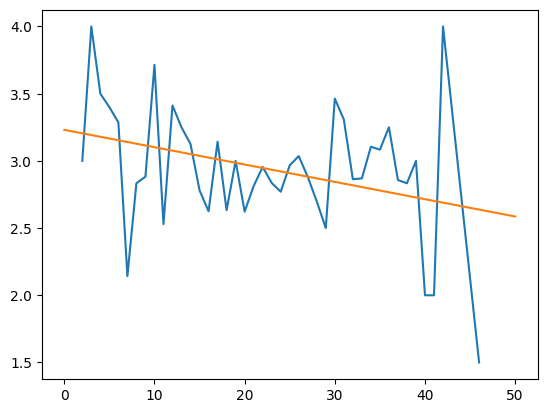

In [86]:
x = result.index.tolist()
y = result.tolist()
data_grouped = tuple(zip(x, y))

correlation = r_coefficient(data_grouped)
significant = correlation <= -0.666 or correlation >= 0.666
best_int = y_int_regression_line(data_grouped)
best_slope = slope_regression_line(data_grouped)
print(f'Correlation significance: {correlation}\n'
      f'Significant: {significant}\n'
      f'Best fit intercept: {best_int}\n'
      f'Best fit slope: {best_slope}')

def func(x_):
    return x_ * best_slope + best_int
x_values = np.linspace(0, 50)
y_values = func(x_values)

plt.plot(x, y)
plt.plot(x_values, y_values)